In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore",category= DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [43]:
df = pd.read_csv("USArrests.csv", index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [44]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


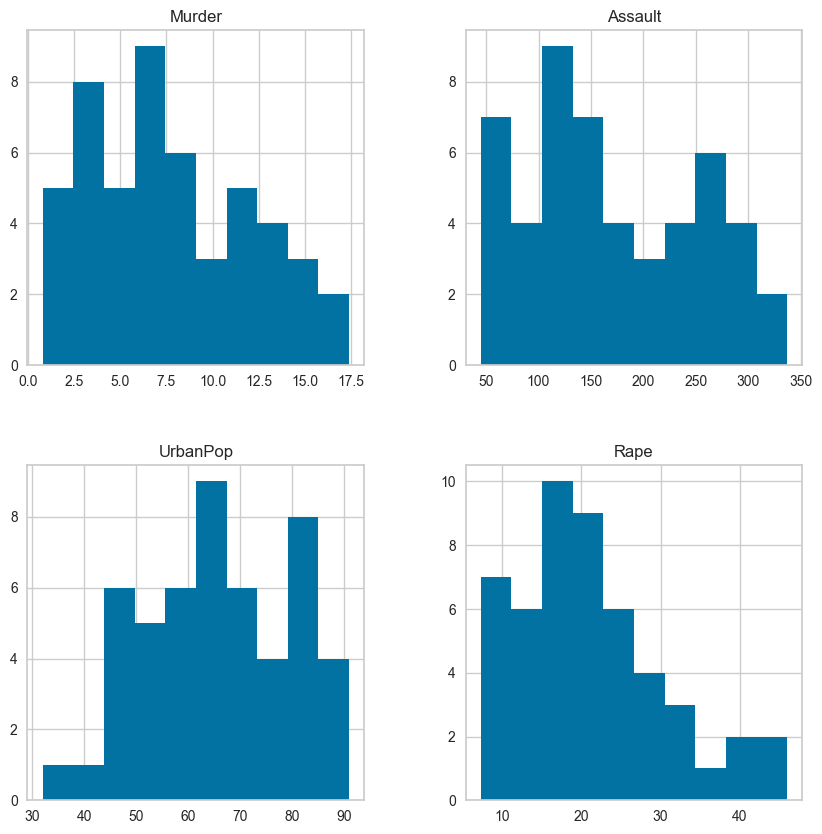

In [47]:
df.hist(figsize=(10,10));

In [48]:
kmeans= KMeans(n_clusters= 4)

In [49]:
k_fit= kmeans.fit(df)

In [50]:
k_fit.n_clusters

4

In [51]:
k_fit.cluster_centers_

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [52]:
k_fit.labels_

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 1,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [53]:
# Kümelerin görselleştirilmesi
k_means= KMeans(n_clusters=2).fit(df)
kumeler= k_means.labels_
kumeler

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

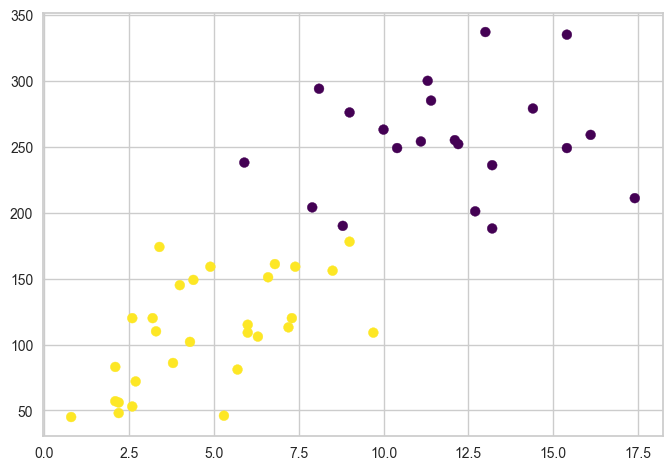

In [54]:
plt.scatter(df.iloc[:,0], df.iloc[:,1],c = kumeler, s=50, cmap="viridis");

In [55]:
merkezler = k_means.cluster_centers_
merkezler

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

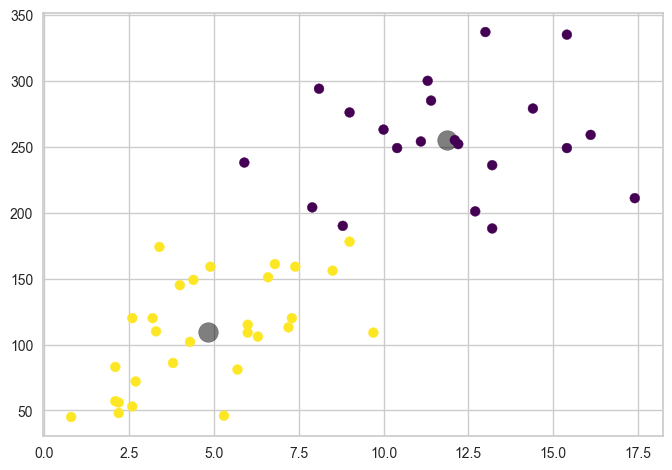

In [56]:
plt.scatter(merkezler[:,0],merkezler[:,1],c="black",s=200,alpha=0.5)
plt.scatter(df.iloc[:,0], df.iloc[:,1],c = kumeler, s=50, cmap="viridis");

# Optimum Küme Sayısının Belirlenmesi

## Elbow Yöntemi

In [57]:
ssd= []

K= range(1,30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Optimum Küme Sayısı için Elbow yöntemi')

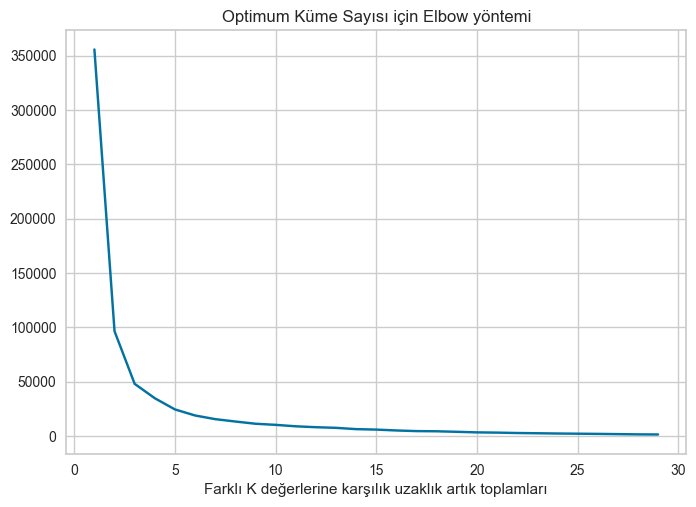

In [58]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K değerlerine karşılık uzaklık artık toplamları")
plt.title("Optimum Küme Sayısı için Elbow yöntemi")

In [59]:
from yellowbrick.cluster import KElbowVisualizer

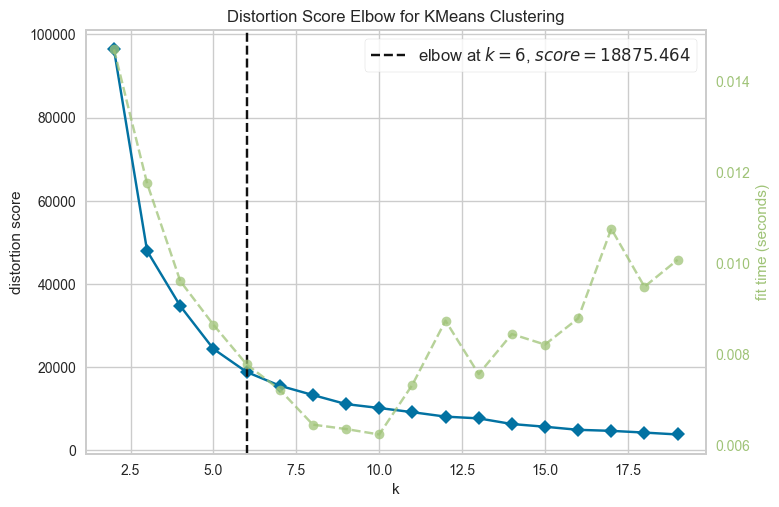

In [60]:
kmeans = KMeans()
visu= KElbowVisualizer(kmeans, k=(2,20))
visu.fit(df)
visu.poof();

In [61]:
kmeans = KMeans(n_clusters=4).fit(df)

In [62]:
kumeler = kmeans.labels_
pd.DataFrame({"Eyaletler":df.index, "Kumeler":kumeler})

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,3
4,California,0
5,Colorado,3
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,3


In [63]:
df["Kume_no"]= kumeler
df

,Murder,Assault,UrbanPop,Rape,Kume_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,3
